<a href="https://colab.research.google.com/github/ybenabed/supervied_learning_MLDS2021/blob/main/bank_client_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
pip install imbalanced-learn

## Chagement de donnees

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
bank_df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/german.csv", names=["status_cce",
"duree_mois",
"hist_credit",
"obj",
"montant_credit",
"compte_epargne",
"emplois_depuis",
"taux_vers_revenu",
"status_sexe",
"autres_debits",
"residence_depuis",
"prop",
"age",
"plans_vers",
"log",
"nbr_credits",
"travail",
"nbr_per_charge",
"tel",
"trav_etranger","label"],
index_col=False)

In [4]:
bank_df.head()

,status_cce,duree_mois,hist_credit,obj,montant_credit,compte_epargne,emplois_depuis,taux_vers_revenu,status_sexe,autres_debits,residence_depuis,prop,age,plans_vers,log,nbr_credits,travail,nbr_per_charge,tel,trav_etranger,label
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [5]:
bank_df.shape

(1000, 21)

Cet ensemble de données comprend 1000 exemples et 20 variables, avec une variable supplémentaire "label" indiquant la classe correspondante à chaque individu.

En visualisant le nombre de valeurs nulles qui existent dans chacune des collones, on remarque que ce jeux de données ne contient aucune valeur nulle qui peut affecter l'apprentissage.

In [6]:
bank_df.isnull().sum()

status_cce          0
duree_mois          0
hist_credit         0
obj                 0
montant_credit      0
compte_epargne      0
emplois_depuis      0
taux_vers_revenu    0
status_sexe         0
autres_debits       0
residence_depuis    0
prop                0
age                 0
plans_vers          0
log                 0
nbr_credits         0
travail             0
nbr_per_charge      0
tel                 0
trav_etranger       0
label               0
dtype: int64

## Analyse Exploratoire

In [7]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_cce        1000 non-null   object
 1   duree_mois        1000 non-null   int64 
 2   hist_credit       1000 non-null   object
 3   obj               1000 non-null   object
 4   montant_credit    1000 non-null   int64 
 5   compte_epargne    1000 non-null   object
 6   emplois_depuis    1000 non-null   object
 7   taux_vers_revenu  1000 non-null   int64 
 8   status_sexe       1000 non-null   object
 9   autres_debits     1000 non-null   object
 10  residence_depuis  1000 non-null   int64 
 11  prop              1000 non-null   object
 12  age               1000 non-null   int64 
 13  plans_vers        1000 non-null   object
 14  log               1000 non-null   object
 15  nbr_credits       1000 non-null   int64 
 16  travail           1000 non-null   object
 17  nbr_per_charge 

### Analyse de quelques varaibles numerique particulieres

#### Taux vers revenu

In [8]:
bank_df['taux_vers_revenu'].unique()

array([4, 2, 3, 1])

La variable taux vers revenu: Taux de versement en pourcentage du revenu disponible. Elle ne contient que 4 valeurs distinctes pour tous les individus. On la considère comme une variable qualitative.

#### Duree Mois

In [9]:
bank_df["duree_mois"].value_counts()

24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: duree_mois, dtype: int64

In [10]:
bank_df["duree_mois"].describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: duree_mois, dtype: float64

On peut transformer la variable duree_mois en une variable categorique en utiltisant des intervalles de coupures, les quartiles par exemple.

#### Residence depuis

In [11]:
bank_df["residence_depuis"].describe()

count    1000.000000
mean        2.845000
std         1.103718
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: residence_depuis, dtype: float64

In [12]:
bank_df["residence_depuis"].value_counts()

4    413
2    308
3    149
1    130
Name: residence_depuis, dtype: int64

La variable residence_depuis ne contient que 4 valeurs distinctes pour tous les individus. On la considère une variable qualitative.

#### Age

In [13]:
bank_df["age"].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64

In [14]:
bank_df["age"].unique()

array([67, 22, 49, 45, 53, 35, 61, 28, 25, 24, 60, 32, 44, 31, 48, 26, 36,
       39, 42, 34, 63, 27, 30, 57, 33, 37, 58, 23, 29, 52, 50, 46, 51, 41,
       40, 66, 47, 56, 54, 20, 21, 38, 70, 65, 74, 68, 43, 55, 64, 75, 19,
       62, 59])

#### Nombre de credit

In [15]:
bank_df["nbr_credits"].unique()

array([2, 1, 3, 4])

In [16]:
bank_df["nbr_credits"].value_counts()

1    633
2    333
3     28
4      6
Name: nbr_credits, dtype: int64

La variable nbr_credits: "Nombre de credits" ne contient que 4 valeurs distinctes pour tous les individus. On la considère une variable qualitative.

#### Nombre de personnes en charge

In [17]:
bank_df["nbr_per_charge"].unique()

array([1, 2])

In [18]:
bank_df["nbr_per_charge"].value_counts()

1    845
2    155
Name: nbr_per_charge, dtype: int64

La variable nbr_per_charge: "Nombre de personnes" ne contient que 2 valeurs distinctes pour tous les individus. On la considère une variable qualitative.

#### Description sur les variables quantatives

In [19]:
bank_numerical_variable = ['duree_mois', 'montant_credit', 'age', 'nbr_credits']
bank_df[bank_numerical_variable].describe()

,duree_mois,montant_credit,age,nbr_credits
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,35.546000,1.407000
std,12.058814,2822.736876,11.375469,0.577654
min,4.000000,250.000000,19.000000,1.000000
25%,12.000000,1365.500000,27.000000,1.000000
50%,18.000000,2319.500000,33.000000,1.000000
75%,24.000000,3972.250000,42.000000,2.000000
max,72.000000,18424.000000,75.000000,4.000000


### Variables Qualitative

Ajouter les variables jugées qualitatives à l'ensemble de variables qualitatives.

In [20]:
bank_int_as_categ = ["taux_vers_revenu", "residence_depuis", "nbr_per_charge"]

In [21]:
bank_int_as_categ

['taux_vers_revenu', 'residence_depuis', 'nbr_per_charge']

In [22]:
bank_categorical = bank_df.select_dtypes(include=['object']).columns.to_list()
bank_categorical.extend(bank_int_as_categ)
bank_numerical = list(set(bank_df.select_dtypes(include=['int']).columns.to_list()) - set(bank_categorical))
bank_numerical.remove('label')

In [23]:
len(bank_categorical)

16

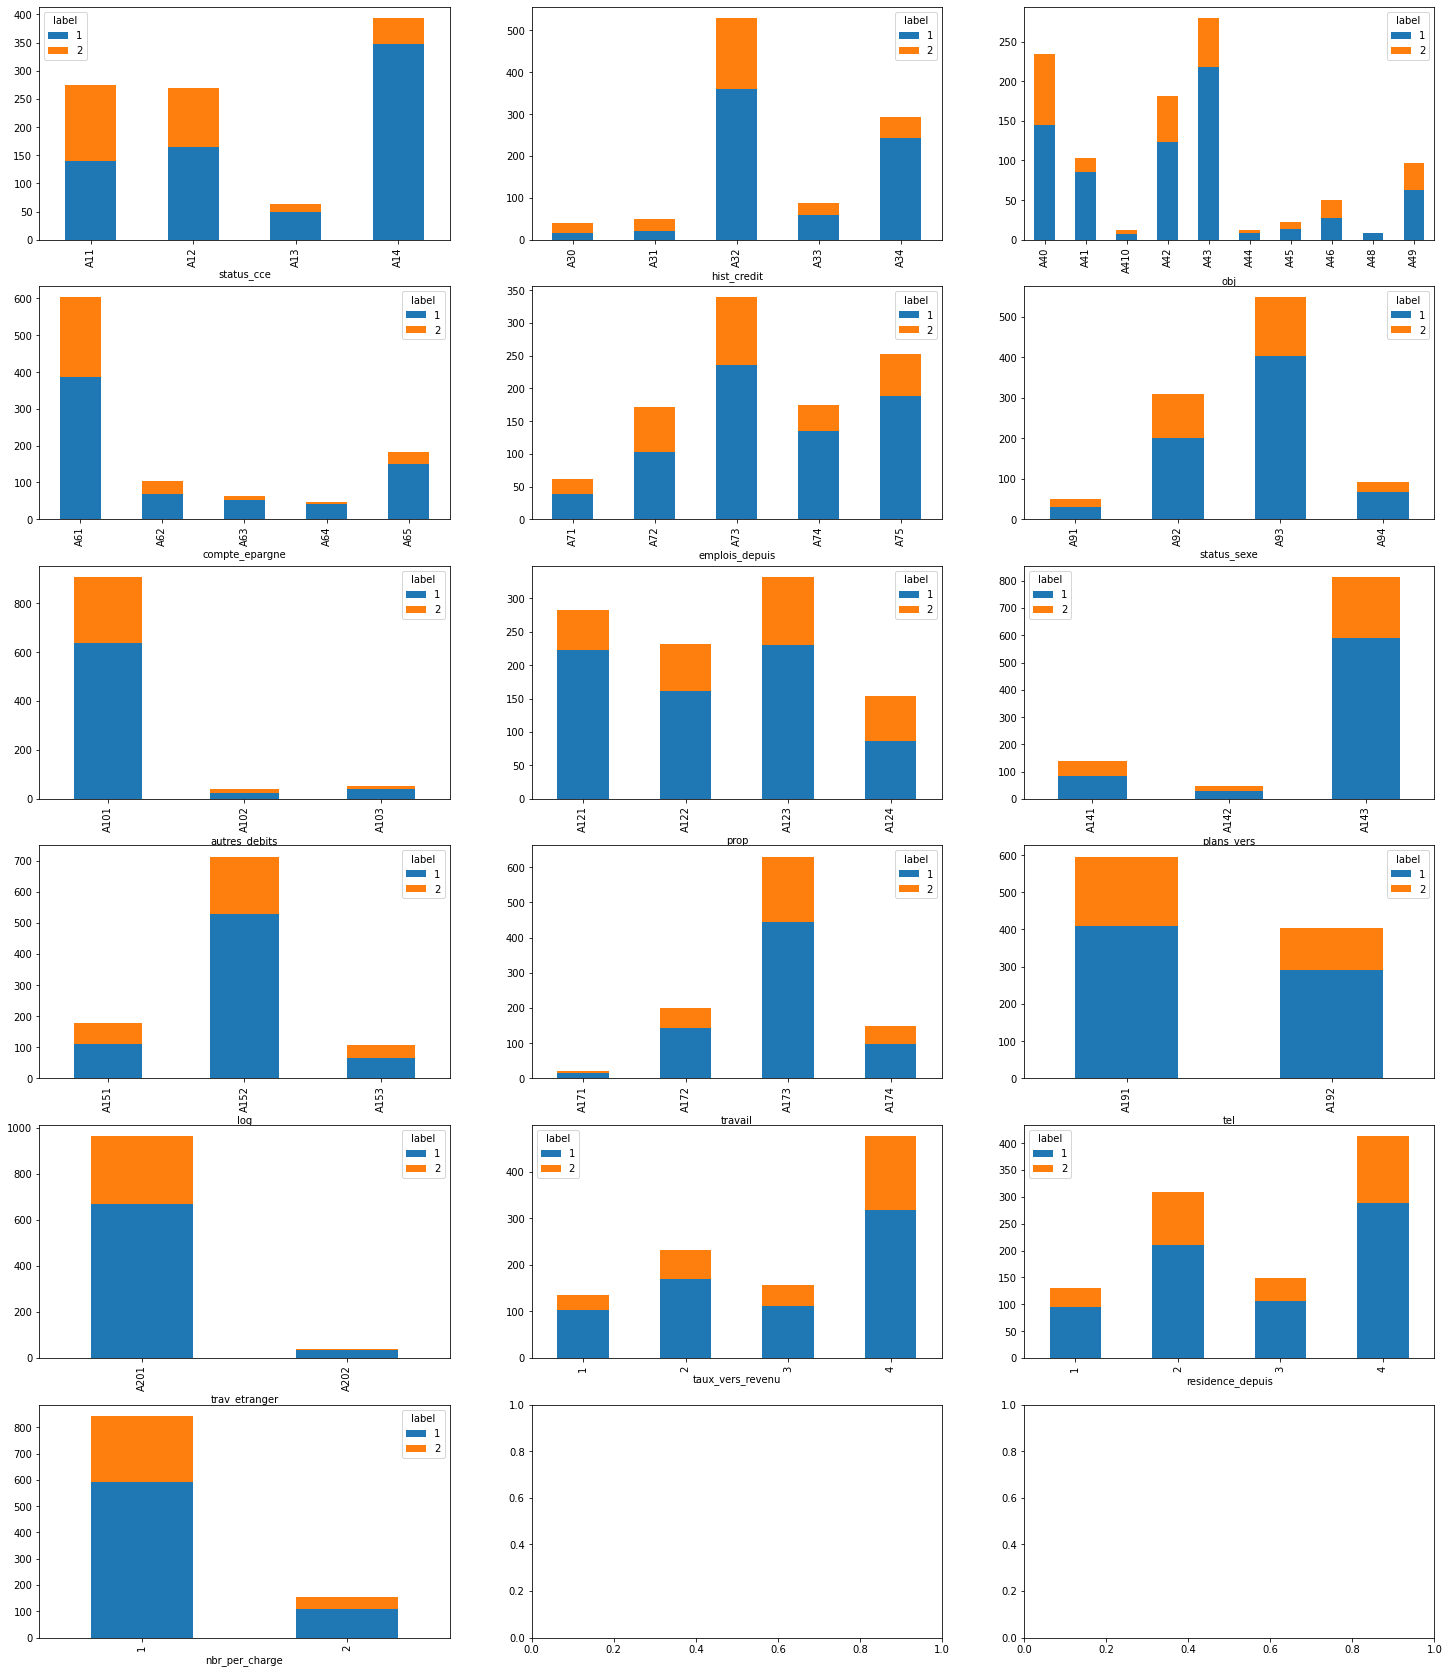

In [24]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(25, 30))
for xcol, ax in zip(bank_categorical, [x for v in axes for x in v]):
    bank_df.groupby([xcol, 'label']).size().unstack("label").plot.bar(ax=ax,stacked=True)

### Variables Quantitaive

['duree_mois', 'age', 'nbr_credits', 'montant_credit']


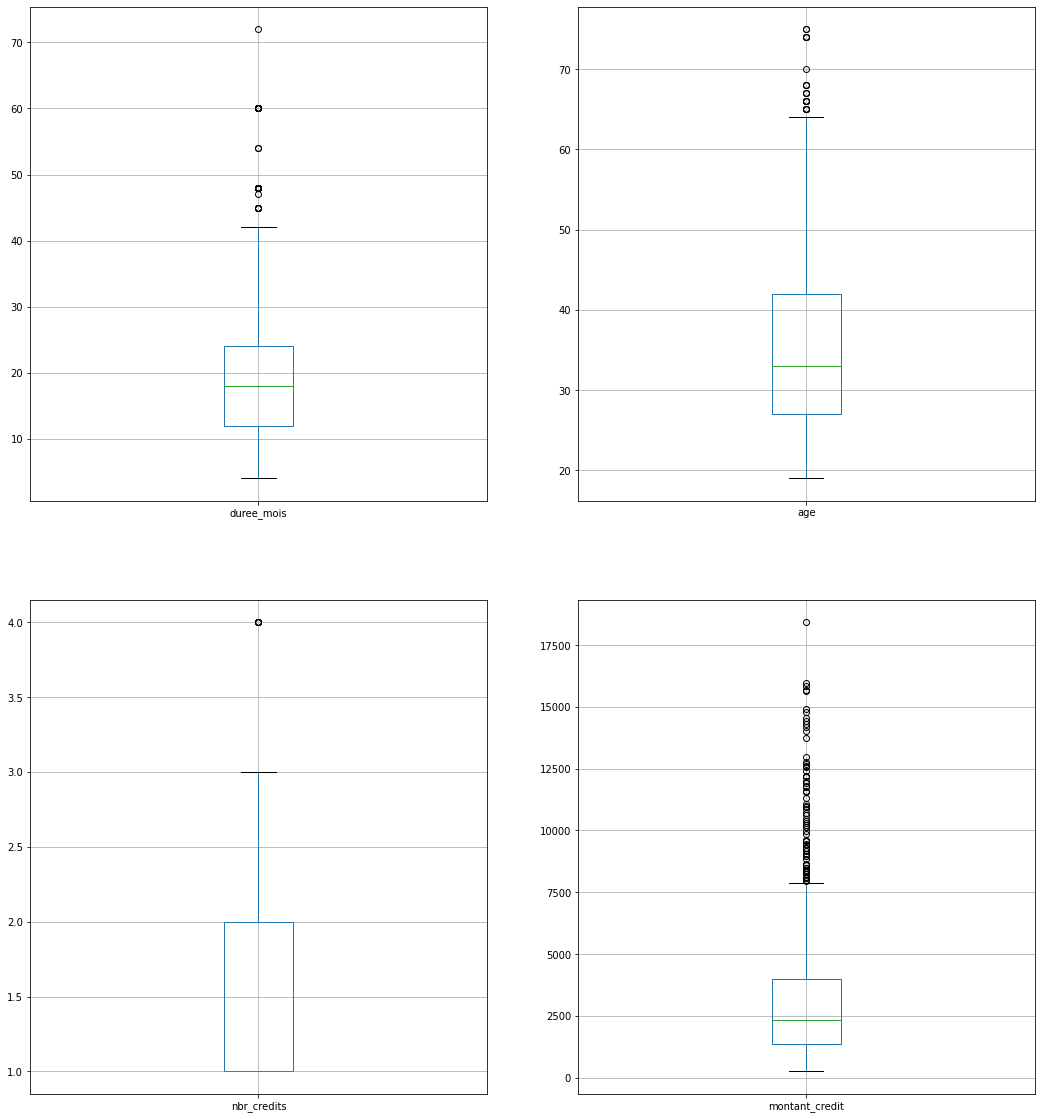

In [25]:
print(bank_numerical)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 20))
for xcol, ax in zip(bank_numerical, [x for v in axes for x in v]):
    # bank_df.groupby([xcol, 'label']).size().unstack("label").plot.bar(ax=ax,stacked=True)
    bank_df.boxplot(ax=ax, column=[xcol])

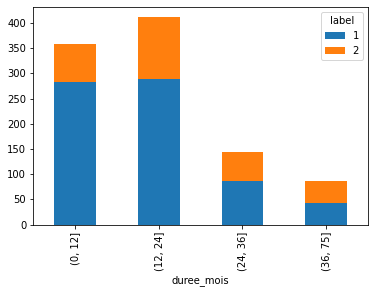

In [26]:
bins = [0,12,24,36,75]
bank_df1 = bank_df[["duree_mois", "label"]].copy()
bank_df1["duree_mois"] = pd.cut(bank_df['duree_mois'], bins)
bank_df1.groupby(['duree_mois', 'label']).size().unstack("label").plot.bar(stacked=True)

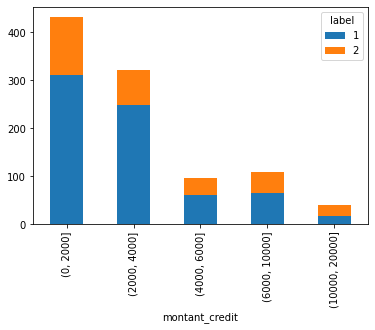

In [27]:
bins = [0,2000,4000,6000,10000, 20000]
bank_df1 = bank_df[["montant_credit", "label"]].copy()
bank_df1["montant_credit"] = pd.cut(bank_df['montant_credit'], bins)
bank_df1.groupby(['montant_credit', 'label']).size().unstack("label").plot.bar(stacked=True)

### Réprtition des classes

1    700
2    300
Name: label, dtype: int64


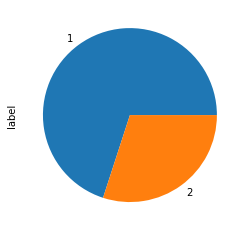

In [28]:
print(bank_df['label'].value_counts())
bank_df['label'].value_counts().plot.pie()

Les individus appartenant à classe 1 représentent 70% de la population. L'autre portion d'individus (30%) est dédiée à la classe 2. 

## Data Preprocessing

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
bank_df1 = bank_df.copy()
for column in bank_df.select_dtypes(include=['object']).columns.to_list():
  bank_df1[column] = pd.factorize(bank_df[column])[0]

In [31]:
bank_df1

,status_cce,duree_mois,hist_credit,obj,montant_credit,compte_epargne,emplois_depuis,taux_vers_revenu,status_sexe,autres_debits,residence_depuis,prop,age,plans_vers,log,nbr_credits,travail,nbr_per_charge,tel,trav_etranger,label
0,0,6,0,0,1169,0,0,4,0,0,4,0,67,0,0,2,0,1,0,0,1
1,1,48,1,0,5951,1,1,2,1,0,2,0,22,0,0,1,0,1,1,0,2
2,2,12,0,1,2096,1,2,2,0,0,3,0,49,0,0,1,1,2,1,0,1
3,0,42,1,2,7882,1,2,2,0,1,4,1,45,0,1,1,0,2,1,0,1
4,0,24,2,3,4870,1,1,3,0,0,4,2,53,0,1,2,0,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,12,1,2,1736,1,2,3,1,0,4,0,31,0,0,1,1,1,1,0,1
996,0,30,1,4,3857,1,1,4,2,0,4,1,40,0,0,1,2,1,0,0,1
997,2,12,1,0,804,1,0,4,0,0,4,3,38,0,0,1,0,1,1,0,1
998,0,45,1,0,1845,1,1,4,0,0,4,2,23,0,1,1,0,1,0,0,2


In [32]:
bank_df1.to_numpy()

array([[ 0,  6,  0, ...,  0,  0,  1],
       [ 1, 48,  1, ...,  1,  0,  2],
       [ 2, 12,  0, ...,  1,  0,  1],
       ...,
       [ 2, 12,  1, ...,  1,  0,  1],
       [ 0, 45,  1, ...,  0,  0,  2],
       [ 1, 45,  0, ...,  1,  0,  1]])

In [33]:
bank_X_numerical = bank_df1[bank_numerical].to_numpy()
bank_X_numerical

array([[   6,   67,    2, 1169],
       [  48,   22,    1, 5951],
       [  12,   49,    1, 2096],
       ...,
       [  12,   38,    1,  804],
       [  45,   23,    1, 1845],
       [  45,   27,    1, 4576]])

In [34]:
bank_X_categorical = bank_df1[bank_categorical].to_numpy()
bank_X_categorical

array([[0, 0, 0, ..., 4, 4, 1],
       [1, 1, 0, ..., 2, 2, 1],
       [2, 0, 1, ..., 2, 3, 2],
       ...,
       [2, 1, 0, ..., 4, 4, 1],
       [0, 1, 0, ..., 4, 4, 1],
       [1, 0, 4, ..., 3, 4, 1]])

In [35]:
bank_X = bank_df1.loc[:, bank_df1.columns != 'label'].to_numpy()
bank_Y = bank_df1['label'].to_numpy()

Jusqu'à ce point on a bank_X, la matrice qui contient tous les individus et variables. bank_X_numerical contenant que les variables numériques. Ainsi que bank_X_categorical qui contient les variables catégorielles.

### Balancer les données

Comme constaté précédemment, les données de ce jeu de données ne sont pas équilibrées, et qu'il y avait une classe majoritaire avec 70% des individus. On a pensé à balancer nos données avec les trois familles de méthodes de balancement de données. 
Over Balancing avec SMOTE, Under Balancing avec Cluster Centroids, et la combinaison des deux avec SMOTEENN

In [36]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN

Les opérations de balancement vont être placées après chaque classification pour éviter les conflits des noms de variables

## Classification

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, KFold
from sklearn.model_selection import train_test_split

Les méthodes de classification qu'on va utiliser sont: 
- La regression logistique.
- Arbre de classification et de regression (CART).
- Forets Aléatoires.
- Classifieur de Naives Bayes.
- K Nearest Neighbors.

On essaiera de classifier les individus selon chacun des 3 jeux de données (Toutes les variables, Variables numériques, Variables catégorielles.) avec ses variants de balancement.

### Numerical Data

#### Balancer les données

In [61]:
smoteImbOver = SMOTE()
bank_X_numerical_smote, bank_Y_smote = smoteImbOver.fit_resample(bank_X_numerical, bank_Y)
bank_X_numerical_smote.shape, bank_Y_smote.shape

((1400, 4), (1400,))

In [62]:
ccImbUnder = ClusterCentroids(random_state=42)
bank_X_numerical_cc, bank_Y_cc = ccImbUnder.fit_resample(bank_X_numerical, bank_Y)
bank_X_numerical_cc.shape, bank_Y_cc.shape

((600, 4), (600,))

In [63]:
smoteImbCombine = SMOTEENN()
bank_X_numerical_smoteenn, bank_Y_smoteenn = smoteImbCombine.fit_resample(bank_X_numerical, bank_Y)
bank_X_numerical_smoteenn.shape, bank_Y_smoteenn.shape

((517, 4), (517,))

#### Classifier

Diviser les données en ensemble d'entraînement et de test.

In [64]:
bank_X_numerical_train, bank_X_numerical_test, bank_Y_train, bank_Y_test = train_test_split(bank_X_numerical, bank_Y, test_size=0.15)
bank_X_numerical_smote_train, bank_X_numerical_smote_test, bank_Y_smote_train, bank_Y_smote_test = train_test_split(bank_X_numerical_smote, bank_Y_smote, test_size=0.15)
bank_X_numerical_cc_train, bank_X_numerical_cc_test, bank_Y_cc_train, bank_Y_cc_test = train_test_split(bank_X_numerical_cc, bank_Y_cc, test_size=0.15)
bank_X_numerical_smoteenn_train, bank_X_numerical_smoteenn_test, bank_Y_smoteenn_train, bank_Y_smoteenn_test = train_test_split(bank_X_numerical_smoteenn, bank_Y_smoteenn, test_size=0.15)

In [65]:
%%capture
methods = {}
methods['LR'] = {'model': LogisticRegression(), 'results': {}}
methods['LDA'] = {'model': LinearDiscriminantAnalysis(), 'results': {}}
methods['KNN'] = {'model': KNeighborsClassifier(), 'results': {}}
methods['CART'] = {'model': DecisionTreeClassifier(), 'results': {}}
methods['RF'] = {'model': RandomForestClassifier(), 'results': {}}
methods['NB'] = {'model': GaussianNB(), 'results': {}}
for name, method in methods.items():
  model = method['model']
  kfold = KFold(n_splits=10)
  model.fit(bank_X_numerical_train, bank_Y_train)
  cv_results_original_train = cross_val_score(model, bank_X_numerical_train, bank_Y_train, cv=kfold, scoring='accuracy')
  cv_results_original_test = cross_val_score(model, bank_X_numerical_test, bank_Y_test, cv=kfold, scoring='accuracy')

  model.fit(bank_X_numerical_smote_train, bank_Y_smote_train)
  cv_results_smote_train = cross_val_score(model, bank_X_numerical_smote_train, bank_Y_smote_train, cv=kfold, scoring='accuracy')
  cv_results_smote_test = cross_val_score(model, bank_X_numerical_smote_test, bank_Y_smote_test, cv=kfold, scoring='accuracy')

  model.fit(bank_X_numerical_cc_train, bank_Y_cc_train)
  cv_results_cc_train = cross_val_score(model, bank_X_numerical_cc_train, bank_Y_cc_train, cv=kfold, scoring='accuracy')
  cv_results_cc_test = cross_val_score(model, bank_X_numerical_cc_test, bank_Y_cc_test, cv=kfold, scoring='accuracy')

  model.fit(bank_X_numerical_smoteenn_train, bank_Y_smoteenn_train)
  cv_results_smoteenn_train = cross_val_score(model, bank_X_numerical_smoteenn_train, bank_Y_smoteenn_train, cv=kfold, scoring='accuracy')
  cv_results_smoteenn_test = cross_val_score(model, bank_X_numerical_smoteenn_test, bank_Y_smoteenn_test, cv=kfold, scoring='accuracy')

  method['results']['original'] = {'train': {'mean': cv_results_original_train.mean(), 'max': cv_results_original_train.max(), 'std': cv_results_original_train.std()}, 'test': {'mean': cv_results_original_test.mean(), 'max': cv_results_original_test.max(), 'std': cv_results_original_test.std()}}
  method['results']['smote'] = {'train': {'mean': cv_results_smote_train.mean(), 'max': cv_results_smote_train.max(), 'std': cv_results_smote_train.std()}, 'test': {'mean': cv_results_smote_test.mean(), 'max': cv_results_smote_test.max(), 'std': cv_results_smote_test.std()}}
  method['results']['cc'] = {'train': {'mean': cv_results_cc_train.mean(), 'max': cv_results_cc_train.max(), 'std': cv_results_cc_train.std()}, 'test': {'mean': cv_results_cc_test.mean(), 'max': cv_results_cc_test.max(), 'std': cv_results_cc_test.std()}}
  method['results']['smoteenn'] = {'train': {'mean': cv_results_smoteenn_train.mean(), 'max': cv_results_smoteenn_train.max(), 'std': cv_results_smoteenn_train.std()}, 'test': {'mean': cv_results_smoteenn_test.mean(), 'max': cv_results_smoteenn_test.max(), 'std': cv_results_smoteenn_test.std()}}

In [66]:
numerical_data_results = pd.DataFrame.from_dict({(i,j,k): methods[i]['results'][j][k] 
                  for i in methods.keys()
                  for j in methods[i]['results'].keys()
                  for k in methods[i]['results'][j].keys()},
              orient='index')

numerical_data_results

mean       max       std
LR   original train  0.692941  0.752941  0.048635
              test   0.766667  0.933333  0.123828
     smote    train  0.607563  0.663866  0.039424
              test   0.628571  0.761905  0.066667
     cc       train  0.547059  0.705882  0.059117
              test   0.633333  0.777778  0.071146
     smoteenn train  0.683298  0.772727  0.047552
              test   0.621429  0.875000  0.246506
LDA  original train  0.690588  0.764706  0.052363
              test   0.766667  0.933333  0.123828
     smote    train  0.615126  0.672269  0.038655
              test   0.614286  0.714286  0.065465
     cc       train  0.556863  0.686275  0.064557
              test   0.622222  0.777778  0.088889
     smoteenn train  0.706131  0.772727  0.044907
              test   0.632143  0.875000  0.193353
KNN  original train  0.615294  0.694118  0.040086
              test   0.726667  0.933333  0.131487
     smote    train  0.657983  0.722689  0.043835
              test   0.566667  0.714286  0.103126
     cc       train  0.533333  0.686275  0.083558
              test   0.555556  0.777778  0.121716
     smoteenn train  0.856448  0.909091  0.033978
              test   0.550000  0.750000  0.131417
CART original train  0.656471  0.741176  0.065249
              test   0.740000  0.866667  0.081377
     smote    train  0.689916  0.798319  0.045324
              test   0.633333  0.809524  0.120562
     cc       train  0.700000  0.745098  0.035130
              test   0.566667  0.777778  0.160631
     smoteenn train  0.856448  0.931818  0.040879
              test   0.705357  0.875000  0.150520
RF   original train  0.674118  0.752941  0.044035
              test   0.720000  0.933333  0.122202
     smote    train  0.724370  0.764706  0.032285
              test   0.661905  0.857143  0.103126
     cc       train  0.717647  0.803922  0.059603
              test   0.655556  0.888889  0.126198
     smoteenn train  0.879334  0.954545  0.047600
              test   0.605357  0.875000  0.139114
NB   original train  0.703529  0.788235  0.058066
              test   0.740000  0.933333  0.150407
     smote    train  0.596639  0.663866  0.036046
              test   0.561905  0.666667  0.069985
     cc       train  0.562745  0.647059  0.063264
              test   0.644444  0.777778  0.083148
     smoteenn train  0.626374  0.681818  0.040025
              test   0.628571  0.875000  0.196396

Sur les données numériques, on a pu arriver à de bonne performances en terme de la métrique d'Accuracy, en constatant que les deux balancements de données (Clusters Centroid et SMOTE) n'ont pas aidé à améliorer les performances, et parfois il a même conduit à des dégradation en performances.

Ceci peut se justifier par le fait que l'inéquilibre n'est pas très significatif (70% face à 30%). Ainsi, le nombre d'individus étant pas très grand, certaines méthdoes de balancement de données font réduire encre plus ce nombre d'individus ce qui ramène à des jeux de données moins riches en termes de données.

Le classifieur Naives Bayes étant l'un des meilleurs algorithme pour ce jeu de données, vu qu'il propose des séparation qui peuvent être quadratiques et donc plus adéquate aux différentes formes de données. Et c'est la raison pour laquelle la LDA n'a pas bien perofrmé vu la non-égalité entre les volumes et les formes des deux classes.

L'analyse linéaire discriminante étant une méthode qui n'est pas dédiée aux données catégorielles, n'a pas donnée de bons résultats à ce niveau/

La méthode de CART a données les meilleures résultats avec les données originales et surtout avec les données balancées avec la combinaison du Over and Under Balancing. Arrivant à une moyenne d'accuracy de 87% et 89% respectivement sur les données de test et des peaks à 100% d'accuracy.


On va récupérer le modèle entraîné avec la méthdoe CART et essayer de voir quelles sont les varaibles qui mennent à la classification à chaque niveau.

In [88]:
cart_model = methods['CART']['model']
cart_model.feature_importances_, cart_model.tree_.feature[0], cart_model.tree_.impurity[0], cart_model.tree_.threshold[0], cart_model.tree_.children_right[0], cart_model.tree_.children_left[0]

(array([0.1333726 , 0.16532027, 0.02275502, 0.67855212]),
 3,
 0.4956387731487487,
 6151.0,
 126,
 1)

***Rappelons que les noms de colonnes des données numériques sont dans l'ordre suivant: ['duree_mois', 'age', 'nbr_credits', 'montant_credit']
***.

On voit bien que la variables d'indice 3 est la plus importantes dans le noeud racine ayant une impurté de 0.49, c'est à dire que c'est elle qui va définir le split. Les individus qui ont des valeurs inférieures à 6151 vont allez au fils gauche (fils d'indice 1) et les autres vont aller à droite (fils d'indice 126

In [90]:
cart_model.tree_.feature[1], cart_model.tree_.impurity[1], cart_model.tree_.threshold[1], cart_model.tree_.children_right[1], cart_model.tree_.children_left[1]

(0, 0.4981934366508406, 12.5, 53, 2)

De même ici, on peut voir que la variable d'indice 0 (la durée en mois) contrinue dans la prise de décision à ce niveau là, tel que les individus avec une valeur inférieure à 12.5 vont aller à gauche vers le fils d'indice 2, et les autres à droite vers le fils d'indice 53. L'impureté de ce noeuds est toujours à 0.49

### Cateogircal Data

#### Balancer les données

In [48]:
smoteImbOver = SMOTE()
bank_X_categorical_smote, bank_Y_smote = smoteImbOver.fit_resample(bank_X_categorical, bank_Y)
bank_X_categorical_smote.shape, bank_Y_smote.shape

((1400, 16), (1400,))

In [49]:
ccImbUnder = ClusterCentroids(random_state=42)
bank_X_categorical_cc, bank_Y_cc = ccImbUnder.fit_resample(bank_X_categorical, bank_Y)
bank_X_categorical_cc.shape, bank_Y_cc.shape

((600, 16), (600,))

In [50]:
smoteImbCombine = SMOTEENN()
bank_X_categorical_smoteenn, bank_Y_smoteenn = smoteImbCombine.fit_resample(bank_X_categorical, bank_Y)
bank_X_categorical_smoteenn.shape, bank_Y_smoteenn.shape

((738, 16), (738,))

#### Classifier

In [51]:
bank_X_categorical_train, bank_X_categorical_test, bank_Y_train, bank_Y_test = train_test_split(bank_X_categorical, bank_Y, test_size=0.15)
bank_X_categorical_smote_train, bank_X_categorical_smote_test, bank_Y_smote_train, bank_Y_smote_test = train_test_split(bank_X_categorical_smote, bank_Y_smote, test_size=0.15)
bank_X_categorical_cc_train, bank_X_categorical_cc_test, bank_Y_cc_train, bank_Y_cc_test = train_test_split(bank_X_categorical_cc, bank_Y_cc, test_size=0.15)
bank_X_categorical_smoteenn_train, bank_X_categorical_smoteenn_test, bank_Y_smoteenn_train, bank_Y_smoteenn_test = train_test_split(bank_X_categorical_smoteenn, bank_Y_smoteenn, test_size=0.15)

In [52]:
%%capture
methods = {}
methods['LR'] = {'model': LogisticRegression(), 'results': {}}
methods['LDA'] = {'model': LinearDiscriminantAnalysis(), 'results': {}}
methods['KNN'] = {'model': KNeighborsClassifier(), 'results': {}}
methods['CART'] = {'model': DecisionTreeClassifier(), 'results': {}}
methods['RF'] = {'model': RandomForestClassifier(), 'results': {}}
methods['NB'] = {'model': GaussianNB(), 'results': {}}
for name, method in methods.items():
  model = method['model']
  kfold = KFold(n_splits=10)
  model.fit(bank_X_categorical_train, bank_Y_train)
  cv_results_original_train = cross_val_score(model, bank_X_categorical_train, bank_Y_train, cv=kfold, scoring='accuracy')
  cv_results_original_test = cross_val_score(model, bank_X_categorical_test, bank_Y_test, cv=kfold, scoring='accuracy')

  model.fit(bank_X_categorical_smote_train, bank_Y_smote_train)
  cv_results_smote_train = cross_val_score(model, bank_X_categorical_smote_train, bank_Y_smote_train, cv=kfold, scoring='accuracy')
  cv_results_smote_test = cross_val_score(model, bank_X_categorical_smote_test, bank_Y_smote_test, cv=kfold, scoring='accuracy')

  model.fit(bank_X_categorical_cc_train, bank_Y_cc_train)
  cv_results_cc_train = cross_val_score(model, bank_X_categorical_cc_train, bank_Y_cc_train, cv=kfold, scoring='accuracy')
  cv_results_cc_test = cross_val_score(model, bank_X_categorical_cc_test, bank_Y_cc_test, cv=kfold, scoring='accuracy')

  model.fit(bank_X_categorical_smoteenn_train, bank_Y_smoteenn_train)
  cv_results_smoteenn_train = cross_val_score(model, bank_X_categorical_smoteenn_train, bank_Y_smoteenn_train, cv=kfold, scoring='accuracy')
  cv_results_smoteenn_test = cross_val_score(model, bank_X_categorical_smoteenn_test, bank_Y_smoteenn_test, cv=kfold, scoring='accuracy')

  method['results']['original'] = {'train': {'mean': cv_results_original_train.mean(), 'max': cv_results_original_train.max(), 'std': cv_results_original_train.std()}, 'test': {'mean': cv_results_original_test.mean(), 'max': cv_results_original_test.max(), 'std': cv_results_original_test.std()}}
  method['results']['smote'] = {'train': {'mean': cv_results_smote_train.mean(), 'max': cv_results_smote_train.max(), 'std': cv_results_smote_train.std()}, 'test': {'mean': cv_results_smote_test.mean(), 'max': cv_results_smote_test.max(), 'std': cv_results_smote_test.std()}}
  method['results']['cc'] = {'train': {'mean': cv_results_cc_train.mean(), 'max': cv_results_cc_train.max(), 'std': cv_results_cc_train.std()}, 'test': {'mean': cv_results_cc_test.mean(), 'max': cv_results_cc_test.max(), 'std': cv_results_cc_test.std()}}
  method['results']['smoteenn'] = {'train': {'mean': cv_results_smoteenn_train.mean(), 'max': cv_results_smoteenn_train.max(), 'std': cv_results_smoteenn_train.std()}, 'test': {'mean': cv_results_smoteenn_test.mean(), 'max': cv_results_smoteenn_test.max(), 'std': cv_results_smoteenn_test.std()}}

In [53]:
categorical_data_results = pd.DataFrame.from_dict({(i,j,k): methods[i]['results'][j][k] 
                  for i in methods.keys()
                  for j in methods[i]['results'].keys()
                  for k in methods[i]['results'][j].keys()},
              orient='index')

categorical_data_results

mean       max       std
LR   original train  0.735294  0.823529  0.041511
              test   0.700000  0.866667  0.130809
     smote    train  0.718487  0.781513  0.034699
              test   0.642857  0.857143  0.109109
     cc       train  0.656863  0.803922  0.063989
              test   0.644444  0.777778  0.108866
     smoteenn train  0.857988  0.936508  0.050633
              test   0.801515  0.909091  0.079729
LDA  original train  0.735294  0.823529  0.041843
              test   0.706667  0.933333  0.137275
     smote    train  0.715126  0.781513  0.033917
              test   0.638095  0.857143  0.111066
     cc       train  0.662745  0.803922  0.060626
              test   0.622222  0.777778  0.113312
     smoteenn train  0.870814  0.936508  0.038573
              test   0.801515  1.000000  0.156648
KNN  original train  0.700000  0.764706  0.035392
              test   0.773333  0.933333  0.104137
     smote    train  0.755462  0.815126  0.042758
              test   0.638095  0.761905  0.077372
     cc       train  0.562745  0.666667  0.054797
              test   0.600000  0.777778  0.150718
     smoteenn train  0.912417  0.968254  0.048113
              test   0.729545  0.909091  0.099819
CART original train  0.661176  0.705882  0.031480
              test   0.646667  0.800000  0.103494
     smote    train  0.746218  0.798319  0.035214
              test   0.647619  0.809524  0.093314
     cc       train  0.694118  0.823529  0.073471
              test   0.566667  0.777778  0.188889
     smoteenn train  0.877138  0.920635  0.029556
              test   0.703030  0.909091  0.098473
RF   original train  0.725882  0.776471  0.042107
              test   0.700000  0.866667  0.127366
     smote    train  0.809244  0.857143  0.043673
              test   0.671429  0.809524  0.103126
     cc       train  0.752941  0.843137  0.050526
              test   0.677778  0.888889  0.152753
     smoteenn train  0.917076  0.968254  0.031580
              test   0.764394  0.916667  0.117385
NB   original train  0.710588  0.776471  0.041827
              test   0.266667  0.466667  0.122927
     smote    train  0.696639  0.781513  0.043899
              test   0.542857  0.714286  0.122706
     cc       train  0.649020  0.784314  0.082934
              test   0.522222  0.888889  0.172491
     smoteenn train  0.661905  0.714286  0.034548
              test   0.675000  0.909091  0.117678

Sur les données catégorielles, on peut constater des améliorations sur les résultats retournés par les différentes méthodes arrivant à de bonnes performances en terme de la métrique d'Accuracy. On ressent d'une manière un peu plus évident que les méthodes de balancement des données ont pu avoir un impact positif sur nos métriques. Il y a pas eu des dégradations en performances comme dans le cas de numérique.

Le classifieur Naives Bayes donant également de bonnes performances algorithme pour ce jeu de données, vu qu'il propose des séparation qui peuvent être quadratiques et donc plus adéquate aux différentes formes de données. Et c'est la raison pour laquelle la LDA n'a pas bien perofrmé vu la non-égalité entre les volumes et les formes des deux classes. 

On constate également la supériorité de la méthode de KNN surtout avec les balanacement de données avec SMOTE.

La méthode de CART n'a pas donnée des résultats aussi bonnes qu'avec les variables numériques. Ceci peut se justifier par le nombre imporant de variables catégorielles qu'il y en a par comparées aux variables numériques


Une limite qui a pu être dépassée avec la méthode de Random Forest qui est là pour palier à ces problèmes en combinant plusieurs arbre à la fois et ne sélectionner qu'un groupe réduit de variables pour décider les coupures.

### All Data

#### Balancer les données

In [54]:
smoteImbOver = SMOTE()
bank_X_smote, bank_Y_smote = smoteImbOver.fit_resample(bank_X, bank_Y)
bank_X_smote.shape, bank_Y_smote.shape

((1400, 20), (1400,))

In [55]:
ccImbUnder = ClusterCentroids(random_state=42)
bank_X_cc, bank_Y_cc = ccImbUnder.fit_resample(bank_X, bank_Y)
bank_X_cc.shape, bank_Y_cc.shape

((600, 20), (600,))

In [56]:
smoteImbCombine = SMOTEENN()
bank_X_smoteenn, bank_Y_smoteenn = smoteImbCombine.fit_resample(bank_X, bank_Y)
bank_X_smoteenn.shape, bank_Y_smoteenn.shape

((485, 20), (485,))

#### Classifier

In [57]:
bank_X_train, bank_X_test, bank_Y_train, bank_Y_test = train_test_split(bank_X, bank_Y, test_size=0.15)
bank_X_smote_train, bank_X_smote_test, bank_Y_smote_train, bank_Y_smote_test = train_test_split(bank_X_smote, bank_Y_smote, test_size=0.15)
bank_X_cc_train, bank_X_cc_test, bank_Y_cc_train, bank_Y_cc_test = train_test_split(bank_X_cc, bank_Y_cc, test_size=0.15)
bank_X_smoteenn_train, bank_X_smoteenn_test, bank_Y_smoteenn_train, bank_Y_smoteenn_test = train_test_split(bank_X_smoteenn, bank_Y_smoteenn, test_size=0.15)

In [58]:
%%capture
methods = {}
methods['LR'] = {'model': LogisticRegression(), 'results': {}}
methods['LDA'] = {'model': LinearDiscriminantAnalysis(), 'results': {}}
methods['KNN'] = {'model': KNeighborsClassifier(), 'results': {}}
methods['CART'] = {'model': DecisionTreeClassifier(), 'results': {}}
methods['RF'] = {'model': RandomForestClassifier(), 'results': {}}
methods['NB'] = {'model': GaussianNB(), 'results': {}}
for name, method in methods.items():
  model = method['model']
  kfold = KFold(n_splits=10)
  model.fit(bank_X_train, bank_Y_train)
  cv_results_original_train = cross_val_score(model, bank_X_train, bank_Y_train, cv=kfold, scoring='accuracy')
  cv_results_original_test = cross_val_score(model, bank_X_test, bank_Y_test, cv=kfold, scoring='accuracy')

  model.fit(bank_X_smote_train, bank_Y_smote_train)
  cv_results_smote_train = cross_val_score(model, bank_X_smote_train, bank_Y_smote_train, cv=kfold, scoring='accuracy')
  cv_results_smote_test = cross_val_score(model, bank_X_smote_test, bank_Y_smote_test, cv=kfold, scoring='accuracy')

  model.fit(bank_X_cc_train, bank_Y_cc_train)
  cv_results_cc_train = cross_val_score(model, bank_X_cc_train, bank_Y_cc_train, cv=kfold, scoring='accuracy')
  cv_results_cc_test = cross_val_score(model, bank_X_cc_test, bank_Y_cc_test, cv=kfold, scoring='accuracy')

  model.fit(bank_X_smoteenn_train, bank_Y_smoteenn_train)
  cv_results_smoteenn_train = cross_val_score(model, bank_X_smoteenn_train, bank_Y_smoteenn_train, cv=kfold, scoring='accuracy')
  cv_results_smoteenn_test = cross_val_score(model, bank_X_smoteenn_test, bank_Y_smoteenn_test, cv=kfold, scoring='accuracy')

  method['results']['original'] = {'train': {'mean': cv_results_original_train.mean(), 'max': cv_results_original_train.max(), 'std': cv_results_original_train.std()}, 'test': {'mean': cv_results_original_test.mean(), 'max': cv_results_original_test.max(), 'std': cv_results_original_test.std()}}
  method['results']['smote'] = {'train': {'mean': cv_results_smote_train.mean(), 'max': cv_results_smote_train.max(), 'std': cv_results_smote_train.std()}, 'test': {'mean': cv_results_smote_test.mean(), 'max': cv_results_smote_test.max(), 'std': cv_results_smote_test.std()}}
  method['results']['cc'] = {'train': {'mean': cv_results_cc_train.mean(), 'max': cv_results_cc_train.max(), 'std': cv_results_cc_train.std()}, 'test': {'mean': cv_results_cc_test.mean(), 'max': cv_results_cc_test.max(), 'std': cv_results_cc_test.std()}}
  method['results']['smoteenn'] = {'train': {'mean': cv_results_smoteenn_train.mean(), 'max': cv_results_smoteenn_train.max(), 'std': cv_results_smoteenn_train.std()}, 'test': {'mean': cv_results_smoteenn_test.mean(), 'max': cv_results_smoteenn_test.max(), 'std': cv_results_smoteenn_test.std()}}

In [59]:
all_data_results = pd.DataFrame.from_dict({(i,j,k): methods[i]['results'][j][k] 
                  for i in methods.keys()
                  for j in methods[i]['results'].keys()
                  for k in methods[i]['results'][j].keys()},
              orient='index')

all_data_results

mean       max       std
LR   original train  0.742353  0.800000  0.046897
              test   0.700000  0.800000  0.074536
     smote    train  0.709244  0.756303  0.031262
              test   0.738095  0.809524  0.074536
     cc       train  0.678431  0.823529  0.075535
              test   0.711111  0.888889  0.113312
     smoteenn train  0.761672  0.880952  0.054380
              test   0.708929  1.000000  0.183164
LDA  original train  0.743529  0.811765  0.049300
              test   0.700000  0.866667  0.080277
     smote    train  0.735294  0.815126  0.048602
              test   0.723810  0.809524  0.059476
     cc       train  0.672549  0.803922  0.086830
              test   0.633333  0.888889  0.186256
     smoteenn train  0.778630  0.880952  0.066740
              test   0.726786  0.875000  0.131720
KNN  original train  0.648235  0.694118  0.035470
              test   0.680000  0.866667  0.132665
     smote    train  0.642017  0.697479  0.028670
              test   0.495238  0.714286  0.126348
     cc       train  0.500000  0.568627  0.057668
              test   0.433333  0.666667  0.116003
     smoteenn train  0.851742  0.926829  0.050917
              test   0.519643  0.750000  0.138425
CART original train  0.716471  0.800000  0.048063
              test   0.720000  0.866667  0.097980
     smote    train  0.711765  0.798319  0.042526
              test   0.666667  0.809524  0.087805
     cc       train  0.725490  0.823529  0.051877
              test   0.666667  0.888889  0.172133
     smoteenn train  0.786295  0.853659  0.046389
              test   0.767857  0.875000  0.104124
RF   original train  0.768235  0.823529  0.040771
              test   0.700000  0.866667  0.123828
     smote    train  0.816807  0.865546  0.025709
              test   0.785714  0.904762  0.093435
     cc       train  0.823529  0.882353  0.039216
              test   0.711111  1.000000  0.200000
     smoteenn train  0.825029  0.880952  0.043966
              test   0.837500  1.000000  0.095648
NB   original train  0.720000  0.788235  0.045807
              test   0.613333  0.733333  0.106667
     smote    train  0.731092  0.773109  0.025210
              test   0.704762  0.857143  0.069985
     cc       train  0.713725  0.764706  0.048980
              test   0.700000  0.888889  0.111665
     smoteenn train  0.761672  0.928571  0.080509
              test   0.860714  1.000000  0.178178

Il semble que l'utilisation de toutes les variables à la fois n'est un choix très pratique, car on peut pas profiter des avantages des méthodes spécifiés à l'un des types de variables ( categ / num ), et donc les résultats vont être diminués en les comparants aux deux parties précédentes.

Les méthodes qui peuvent utiliser les deux types de variables ont pu gardé leurs bonnes performances.